<a href="https://colab.research.google.com/github/KalyanMohanty/Fruit_Classification/blob/main/cnn_model_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models,layers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LeakyReLU

In [6]:

names = os.listdir("/content/drive/MyDrive/fruit dataset/")
print("Name of the Fruits and Category \n", names[0:6])
# Name of the Fruits and Category 
#  ['fresh bananas', 'fresh oranges', 'rotten apples', 'fresh apples', 'rotten bananas', 'rotten oranges']
images = []
x = []
y = []
for folder in names:
  files = os.listdir("/content/drive/MyDrive/fruit dataset/"+folder)
  for file in files:
    img = image.load_img("/content/drive/MyDrive/fruit dataset/"+folder+"/"+file,target_size=(200,200))
    images.append(img)
    img = image.img_to_array(img)
    x.append(img)
    y.append(names.index(folder))

Name of the Fruits and Category 
 ['fresh bananas', 'fresh oranges', 'rotten apples', 'fresh apples', 'rotten bananas', 'rotten oranges']


In [7]:
x = np.array(x)
y = np.array(y)
print(x.shape)
print(y.shape)
(850, 200, 200, 3)
(850,)
y = to_categorical(y)
print(y.shape)
(850, 6)
x = x/255

(850, 200, 200, 3)
(850,)
(850, 6)


# Model 1

In [13]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=5)

callback = EarlyStopping(monitor = 'val_loss',min_delta = 0,patience = 3, verbose = 1,restore_best_weights = True)
model = models.Sequential()

model.add(layers.Conv2D(64,(3,3),input_shape=(200,200,3),activation=LeakyReLU(alpha=0.01)))
model.add(layers.Conv2D(64,(3,3),activation=LeakyReLU(alpha=0.01)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(128,(3,3),activation=LeakyReLU(alpha=0.01)))
model.add(layers.Conv2D(128,(3,3),activation=LeakyReLU(alpha=0.01)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(256,(3,3),activation=LeakyReLU(alpha=0.01)))
model.add(layers.Conv2D(256,(3,3),activation=LeakyReLU(alpha=0.01)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(180,activation=LeakyReLU(alpha=0.01)))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(100,activation=LeakyReLU(alpha=0.01)))
model.add(layers.Dense(6,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
his = model.fit(xtrain,ytrain,batch_size=64,epochs=50,validation_data=(xtest,ytest), verbose = 1, callbacks=[callback])
#categorical_crossentropy
# squared_hinge
#sparse_categorical_crossentropy
# kullback_leibler_divergence

Epoch 1/50
11/11 [==============================] - 11s 962ms/step - loss: 2.5189 - accuracy: 0.1529 - val_loss: 1.7918 - val_accuracy: 0.1529
Epoch 2/50
11/11 [==============================] - 10s 935ms/step - loss: 1.7562 - accuracy: 0.2044 - val_loss: 1.7577 - val_accuracy: 0.3647
Epoch 3/50
11/11 [==============================] - 10s 938ms/step - loss: 1.7610 - accuracy: 0.2162 - val_loss: 1.6132 - val_accuracy: 0.4294
Epoch 4/50
11/11 [==============================] - 10s 940ms/step - loss: 1.5046 - accuracy: 0.3956 - val_loss: 1.2874 - val_accuracy: 0.4529
Epoch 5/50
11/11 [==============================] - 10s 938ms/step - loss: 1.1716 - accuracy: 0.5515 - val_loss: 1.6147 - val_accuracy: 0.4882
Epoch 6/50
11/11 [==============================] - 10s 943ms/step - loss: 1.0689 - accuracy: 0.5912 - val_loss: 1.0661 - val_accuracy: 0.6176
Epoch 7/50
11/11 [==============================] - 10s 942ms/step - loss: 0.9434 - accuracy: 0.6456 - val_loss: 1.0323 - val_accuracy: 0.6471

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 198, 198, 64)      1792      
                                                                 
 conv2d_13 (Conv2D)          (None, 196, 196, 64)      36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 98, 98, 64)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 98, 98, 64)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 96, 96, 128)       73856     
                                                                 
 conv2d_15 (Conv2D)          (None, 94, 94, 128)       147584    
                                                      

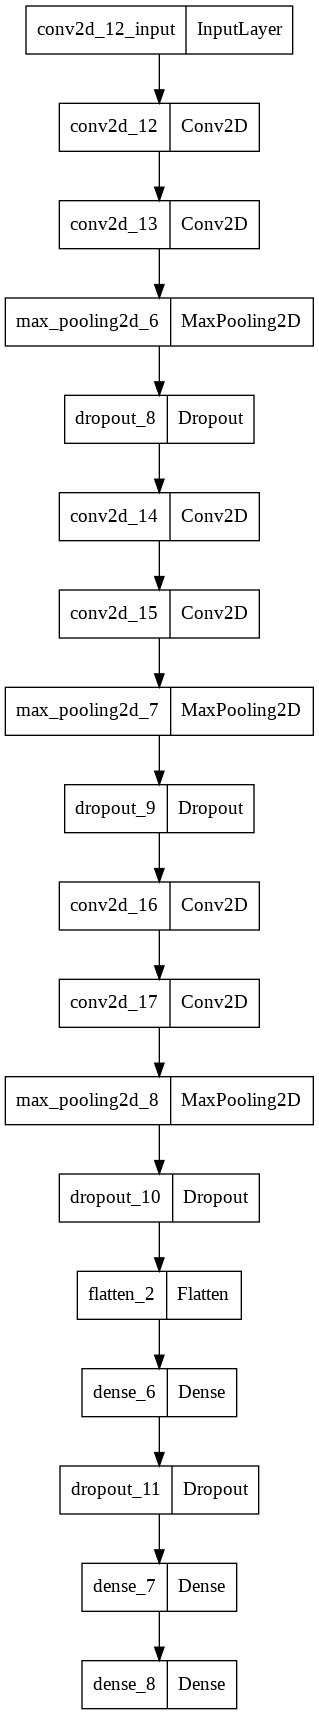

In [27]:
from tensorflow.keras.utils import plot_model
plot_model(
    model,
    to_file="/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/cnn_tuning/cnn_tunned_model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
)

In [19]:
model.save('/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/cnn_tuning/cnn_tunned_final_model.h5')

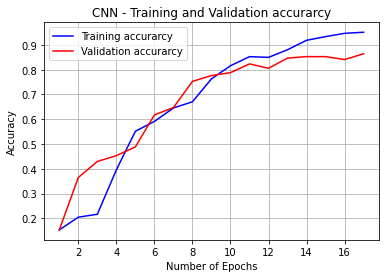

In [14]:
#get the details form the history object
acc = his.history['accuracy']
val_acc = his.history['val_accuracy']
loss = his.history['loss']
val_loss = his.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('CNN - Training and Validation accurarcy')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()

plt.savefig("/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/cnn_tuning/CNN_Accuracy_14_epoch.png")

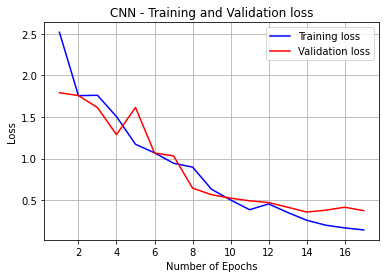

In [15]:
plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('CNN - Training and Validation loss')
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()

plt.savefig("/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/cnn_tuning/CNN_Loss_15_epoch.png")

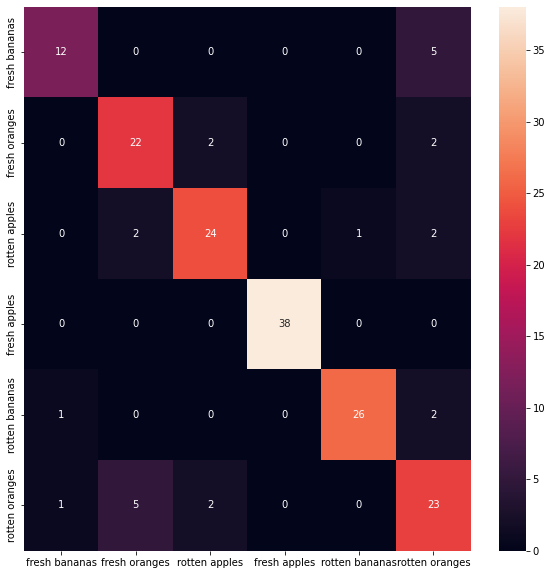

[[12  0  0  0  0  5]
 [ 0 22  2  0  0  2]
 [ 0  2 24  0  1  2]
 [ 0  0  0 38  0  0]
 [ 1  0  0  0 26  2]
 [ 1  5  2  0  0 23]]


<Figure size 432x288 with 0 Axes>

In [16]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred=model.predict(xtest)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true=np.argmax(ytest,axis=1)
#compute conf mat
conf_mat=confusion_matrix(y_true,y_pred_classes)
#plot the con mat
fruit_names=['fresh bananas',
 'fresh oranges',
 'rotten apples',
 'fresh apples',
 'rotten bananas',
 'rotten oranges']
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(fruit_names)
ax.set_yticklabels(fruit_names)
plt.show()
print(conf_mat)
plt.savefig("/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/cnn_tuning/confusion_matrix_14_epochs.png")

In [18]:
from sklearn.metrics import confusion_matrix, classification_report
print('Classification Report')
print(classification_report(y_true,y_pred_classes))

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.71      0.77        17
           1       0.76      0.85      0.80        26
           2       0.86      0.83      0.84        29
           3       1.00      1.00      1.00        38
           4       0.96      0.90      0.93        29
           5       0.68      0.74      0.71        31

    accuracy                           0.85       170
   macro avg       0.85      0.84      0.84       170
weighted avg       0.86      0.85      0.85       170



# Model 2

In [20]:
# from sklearn.model_selection import train_test_split
# # AveragePooling2D
# xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=5)
# model = models.Sequential()

# model.add(layers.Conv2D(64,(3,3),input_shape=(200,200,3),activation = 'relu'))
# model.add(layers.Conv2D(64,(3,3),activation='relu'))
# model.add(layers.MaxPooling2D(pool_size=(2,2)))


# model.add(layers.Conv2D(128,(3,3),activation='relu'))
# model.add(layers.Conv2D(128,(3,3),activation='relu'))
# model.add(layers.Conv2D(128,(3,3),activation='relu'))
# model.add(layers.Conv2D(128,(3,3),activation='relu'))
# model.add(layers.MaxPooling2D(pool_size=(2,2)))

# model.add(layers.Conv2D(256,(3,3),activation='relu'))
# model.add(layers.Conv2D(256,(3,3),activation='relu'))
# model.add(layers.Conv2D(256,(3,3),activation='relu'))
# model.add(layers.Conv2D(256,(3,3),activation='relu'))
# model.add(layers.MaxPooling2D(pool_size=(2,2)))


# model.add(layers.Flatten())
# model.add(layers.Dense(1024,activation='relu'))


# model.add(layers.Dense(6,activation='softmax'))
# model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# his = model.fit(xtrain,ytrain,batch_size=64,epochs=100,validation_data=(xtest,ytest))

In [22]:
# model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 198, 198, 64)      1792      
                                                                 
 conv2d_13 (Conv2D)          (None, 196, 196, 64)      36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 98, 98, 64)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 98, 98, 64)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 96, 96, 128)       73856     
                                                                 
 conv2d_15 (Conv2D)          (None, 94, 94, 128)       147584    
                                                      

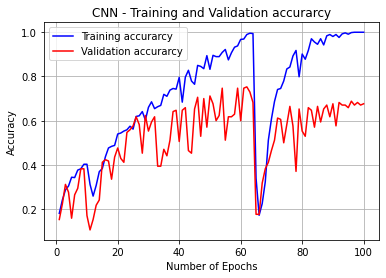

In [ ]:
#get the details form the history object
acc = his.history['accuracy']
val_acc = his.history['val_accuracy']
loss = his.history['loss']
val_loss = his.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('CNN - Training and Validation accurarcy')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()

plt.savefig("/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/cnn_tuning/CNN_Accuracy_100_epochs_model2.png")

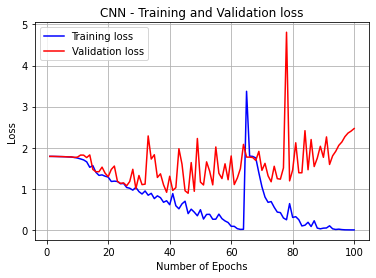

In [ ]:
plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('CNN - Training and Validation loss')
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()

plt.savefig("/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/cnn_tuning/CNN_Loss_100_epochs_model2.png")

# Model 3

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=5)
model = models.Sequential()

model.add(layers.Conv2D(64,(3,3),input_shape=(200,200,3),activation = 'relu'))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.BatchNormalization(axis = 2))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))
# model.add(layers.BatchNormalization(axis = 2))

model.add(layers.Conv2D(256,(3,3),activation='relu'))
model.add(layers.Conv2D(256,(3,3),activation='relu'))
model.add(layers.Conv2D(256,(3,3),activation='relu'))
model.add(layers.Conv2D(256,(3,3),activation='relu'))

model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization(axis = 2))


model.add(layers.Conv2D(512,(3,3),activation='relu'))
model.add(layers.Conv2D(512,(3,3),activation='relu'))
# model.add(layers.Conv2D(512,(3,3),activation='relu'))
# model.add(layers.Conv2D(512,(3,3),activation='relu'))
# model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.GlobalAveragePooling2D())





model.add(layers.Flatten())
# model.add(layers.Dense(180,activation='relu'))
# model.add(layers.Dropout(0.5))

model.add(layers.Dense(1024,activation='relu'))
model.add(layers.Dense(6,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
his = model.fit(xtrain,ytrain,batch_size=64,epochs=200,validation_data=(xtest,ytest))
# categorical_crossentropy
#GlobalAveragePooling2D

Epoch 1/200
11/11 [==============================] - 17s 1s/step - loss: 2.6633 - accuracy: 0.1662 - val_loss: 4.5856 - val_accuracy: 0.1000
Epoch 2/200
11/11 [==============================] - 15s 1s/step - loss: 1.5401 - accuracy: 0.3103 - val_loss: 7.3316 - val_accuracy: 0.1706
Epoch 3/200
11/11 [==============================] - 15s 1s/step - loss: 1.4758 - accuracy: 0.3794 - val_loss: 2.3463 - val_accuracy: 0.1000
Epoch 4/200
11/11 [==============================] - 15s 1s/step - loss: 1.3945 - accuracy: 0.4221 - val_loss: 1.9569 - val_accuracy: 0.1647
Epoch 5/200
11/11 [==============================] - 15s 1s/step - loss: 1.3766 - accuracy: 0.4250 - val_loss: 2.1288 - val_accuracy: 0.1824
Epoch 6/200
11/11 [==============================] - 15s 1s/step - loss: 1.3765 - accuracy: 0.3912 - val_loss: 2.8615 - val_accuracy: 0.1529
Epoch 7/200
11/11 [==============================] - 15s 1s/step - loss: 1.2949 - accuracy: 0.4574 - val_loss: 1.6011 - val_accuracy: 0.2765
Epoch 8/200
1

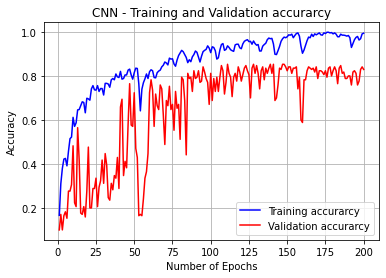

In [ ]:
#get the details form the history object
acc = his.history['accuracy']
val_acc = his.history['val_accuracy']
loss = his.history['loss']
val_loss = his.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('CNN - Training and Validation accurarcy')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()

plt.savefig("/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/cnn_tuning/CNN_Accuracy_100_epochs_model3.png")

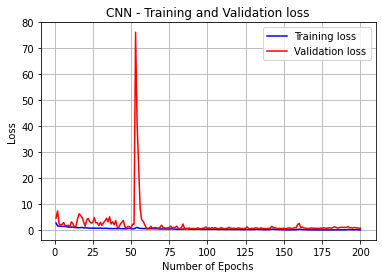

In [ ]:
plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('CNN - Training and Validation loss')
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()

plt.savefig("/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/cnn_tuning/CNN_Loss_100_epochs_model3.png")

# model 4 VGG 16

In [12]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=5)

In [14]:
# model = models.Sequential()
# model.add(Conv2D(input_shape=(200, 200,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Flatten())
# model.add(Dense(units=4096,activation="relu"))
# model.add(Dense(units=4096,activation="relu"))
# model.add(Dense(units=6, activation="softmax"))
# # from keras.optimizers import Adam
# # opt = Adam(lr=0.001)
# model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [20]:
# model.save('/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/cnn_tuning/FruitNetv1.h5')

In [25]:
# from tensorflow.keras.models import load_model
# train_imnet_weight_on_model = load_model('/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/cnn_tuning/FruitNetv1.h5')

In [48]:
# train_imnet_weight_on_model.summary()

In [47]:
# import tensorflow
# import tensorflow_datasets as tfds
# labels_path = tensorflow.keras.utils.get_file('/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/cnn_tuning/ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
# imagenet_labels = np.array(open(labels_path).read().splitlines())

# # Set data_dir to a read-only storage of .tar files
# # Set write_dir to a w/r storage
# data_dir = '/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/cnn_tuning/'
# write_dir = '/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/cnn_tuning/'

# # Construct a tf.data.Dataset
# download_config = tfds.download.DownloadConfig(
#                       extract_dir=os.path.join(write_dir, 'extracted'),
#                       manual_dir=data_dir
#                   )
# download_and_prepare_kwargs = {
#     'download_dir': os.path.join(write_dir, '/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/cnn_tuning/downloaded'),
#     'download_config': download_config,
# }
# ds = tfds.load('/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/cnn_tuning/', 
#                data_dir=os.path.join(write_dir, '/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/cnn_tuning/data/'),         
#                split='train', 
#                shuffle_files=False, 
#                download=True, 
#                as_supervised=True,
#                download_and_prepare_kwargs=download_and_prepare_kwargs)

In [61]:
def buildModel():
  model = models.Sequential()
  model.add(Conv2D(input_shape=(200, 200,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  # model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  # model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  # model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  # model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  # model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  # model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  model.add(Flatten())
  model.add(Dense(units=4096,activation="relu"))
  model.add(Dense(units=4096,activation="relu"))
  model.add(Dense(units=6, activation="softmax"))
  # from keras.optimizers import Adam
  # opt = Adam(lr=0.001)
  # model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
  return model

In [62]:
# def updateTargetModel(model, targetModel):
#   modelWeights       = model.trainable_weights
#   targetModelWeights = targetModel.trainable_weights

#   for i in range(len(targetModelWeights)):
#     targetModelWeights[i].assign(modelWeights[i])

In [63]:
from keras.applications.vgg16 import VGG16
model3 = VGG16(weights='imagenet')

In [64]:
input_layer = layers.Input(shape=(200,200,3))
model3 = VGG16(weights='imagenet',include_top=False,input_tensor=input_layer)

In [65]:
last_layer = model3.output

flat = layers.Flatten()(last_layer)
output_layer = layers.Dense(6,activation='softmax')(flat)

vgg16_model = models.Model(inputs=input_layer,outputs=output_layer)
for layer in vgg16_model.layers[:-1]:
  layer.trainable=False

In [72]:
model_copy= keras.models.clone_model(vgg16_model)
model_copy.build((buildModel())) # replace 10 with number of variables in input layer
model_copy.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])
model_copy.set_weights(model_copy.get_weights())

In [73]:
model_copy.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0   

In [23]:
# his = model_copy.fit(xtrain,ytrain,batch_size=64,epochs=200,validation_data=(xtest,ytest))